In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

Text(0.5, 0, 'Average Rating given by users')

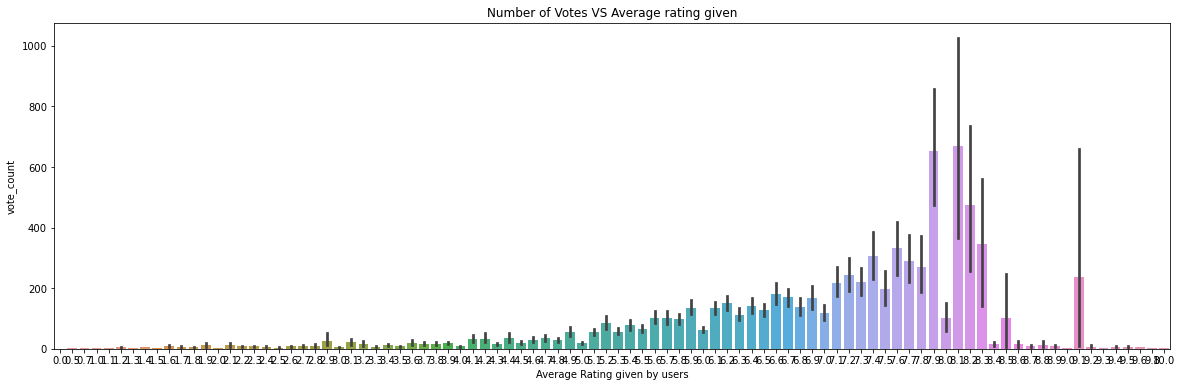

In [13]:
plt.figure(figsize=(20,6))
plt.title("Number of Votes VS Average rating given")
sns.barplot(x=metadata['vote_average'], y=metadata['vote_count'])
plt.xlabel("Average Rating given by users")

<AxesSubplot:xlabel='vote_average', ylabel='vote_count'>

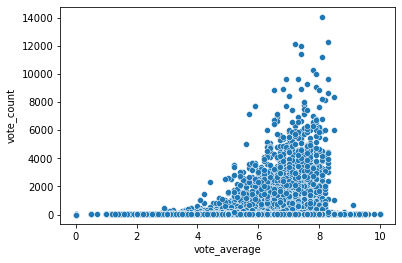

In [14]:
sns.scatterplot(x=metadata['vote_average'], y=metadata['vote_count'])

In [2]:
rate=pd.read_csv('ratings.csv')
metadata = pd.read_csv('movies_metadata.csv')
cred = pd.read_csv('credits.csv')

In [3]:
vote_count = metadata[metadata['vote_count'].notnull()]['vote_count'].astype('int')
vote_average = metadata[metadata['vote_average'].notnull()]['vote_average'].astype('int')
vote_mean = vote_average.mean()
vote_mean

5.244896612406511

In [5]:
eligible = metadata[(metadata['vote_count'].notnull()) & (metadata['vote_average'].notnull())][['title', 'vote_count', 'vote_average', 'popularity', 'genres']]  
eligible['vote_count'] = eligible['vote_count'].astype('int')
eligible['vote_average'] = eligible['vote_average'].astype('int')
eligible.shape

(45460, 5)

In [6]:
n = vote_count.quantile(0.95)
n

434.0

In [7]:
def find_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+n) * R) + (n/(n+v) * vote_mean)

In [8]:
eligible['weighted_rating'] = eligible.apply(find_rating, axis =1)

In [9]:
eligible = eligible.sort_values('weighted_rating', ascending = False).head(250)

In [10]:
eligible.head(20)

,title,vote_count,vote_average,popularity,genres,weighted_rating
15480,Inception,14075,8,29.108149,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",7.917588
12481,The Dark Knight,12269,8,123.167259,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",7.905871
22879,Interstellar,11187,8,32.213481,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",7.897107
2843,Fight Club,9678,8,63.869599,"[{'id': 18, 'name': 'Drama'}]",7.881753
4863,The Lord of the Rings: The Fellowship of the Ring,8892,8,32.070725,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",7.871787
292,Pulp Fiction,8670,8,140.950236,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",7.868660
314,The Shawshank Redemption,8358,8,51.645403,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",7.864000
7000,The Lord of the Rings: The Return of the King,8226,8,29.324358,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",7.861927
351,Forrest Gump,8147,8,48.307194,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",7.860656
5814,The Lord of the Rings: The Two Towers,7641,8,29.423537,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",7.851924


In [3]:
identity = metadata.iloc[:,5]

In [4]:
i=0
for x in identity :
    i=i+1
    metadata.iloc[(i-1):i,5]= str(x)
    

In [5]:
actor = cred.iloc[:,2]

In [10]:
i=0
for x in actor :
    i=i+1
    cred.iloc[(i-1):i,2]= str(x)
    

In [11]:
left = cred.set_index(['id'])
right = metadata.set_index(['id'])

Actors=left.join(right, lsuffix='actor', rsuffix='genre')

In [12]:
Actors=Actors[pd.notnull(Actors.genres) & pd.notnull(Actors.vote_average)]

In [13]:
Actors

,cast,crew,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,,,
100,"[{'cast_id': 12, 'character': 'Tom', 'credit_i...","[{'credit_id': '52fe4217c3a36847f80035c1', 'de...",False,NaN,100,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",http://www.universalstudiosentertainment.com/l...,tt0120735,en,"Lock, Stock and Two Smoking Barrels",...,1998-03-05,3897569.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Disgrace to Criminals Everywhere.,"Lock, Stock and Two Smoking Barrels",False,7.5,1671.0
10000,[],"[{'credit_id': '5375293cc3a3681ee90001ad', 'de...",False,NaN,10000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0109747,es,La estrategia del caracol,...,1993-12-25,0.0,116.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,La estrategia del caracol,False,7.2,9.0
10001,"[{'cast_id': 17, 'character': 'Albert Einstein...","[{'credit_id': '52fe43039251416c75000035', 'de...",False,NaN,10001,"[{'id': 35, 'name': 'Comedy'}, {'id': 878, 'na...",NaN,tt0096486,en,Young Einstein,...,1988-12-15,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,E=mc²,Young Einstein,False,4.5,46.0
100010,"[{'cast_id': 4, 'character': 'Ens. Alan Drake'...","[{'credit_id': '52fe49c7c3a36847f81a5a21', 'de...",False,NaN,100010,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",NaN,tt0032477,en,Flight Command,...,1940-12-27,0.0,116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"T-H-R-I-L-L AMERICA! Here come The Flying ""HEL...",Flight Command,False,6.0,1.0
100017,"[{'cast_id': 1, 'character': 'Jan Winkler', 'c...","[{'credit_id': '53f5e242c3a36833f7003a15', 'de...",False,NaN,89242,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0488903,de,Verfolgt,...,2006-08-06,0.0,87.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,Hounded,False,4.8,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99946,"[{'cast_id': 15, 'character': 'Violet', 'credi...","[{'credit_id': '52fe4a499251416c750e3f8d', 'de...",False,NaN,201018,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0016832,en,Exit Smiling,...,1926-11-06,0.0,77.0,[],Released,NaN,Exit Smiling,False,8.5,2.0
9995,"[{'cast_id': 22, 'character': 'Mr. B', 'credit...","[{'credit_id': '52fe455ac3a36847f80c9725', 'de...",False,NaN,9995,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,tt0216772,en,Turn It Up,...,2000-09-06,0.0,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,How you gonna win?,Turn It Up,False,5.0,5.0
9997,"[{'cast_id': 15, 'character': 'Sammael', 'cred...","[{'credit_id': '52fe455ac3a36847f80c9817', 'de...",False,NaN,9997,"[{'id': 14, 'name': 'Fantasy'}, {'id': 27, 'na...",NaN,tt0857376,ab,Gabriel,...,2007-11-15,0.0,109.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Far From Grace,Gabriel,False,5.0,77.0


In [20]:
def actors(x):
    names = x['cast']
    return (names.split())

In [21]:
Actors['actors'] = Actors.apply(actors, axis =1)

In [22]:
Actors.head()

,cast,crew,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,actors
id,,,,,,,,,,,,,,,,,,,,,
100,"[{'cast_id': 12, 'character': 'Tom', 'credit_i...","[{'credit_id': '52fe4217c3a36847f80035c1', 'de...",False,NaN,1350000,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",http://www.universalstudiosentertainment.com/l...,tt0120735,en,"Lock, Stock and Two Smoking Barrels",...,3897569.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Disgrace to Criminals Everywhere.,"Lock, Stock and Two Smoking Barrels",False,7.5,1671.0,"[[{'cast_id':, 12,, 'character':, 'Tom',, 'cre..."
10000,[],"[{'credit_id': '5375293cc3a3681ee90001ad', 'de...",False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0109747,es,La estrategia del caracol,...,0.0,116.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,La estrategia del caracol,False,7.2,9.0,[[]]
10001,"[{'cast_id': 17, 'character': 'Albert Einstein...","[{'credit_id': '52fe43039251416c75000035', 'de...",False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 878, 'na...",NaN,tt0096486,en,Young Einstein,...,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,E=mc²,Young Einstein,False,4.5,46.0,"[[{'cast_id':, 17,, 'character':, 'Albert, Ein..."
100010,"[{'cast_id': 4, 'character': 'Ens. Alan Drake'...","[{'credit_id': '52fe49c7c3a36847f81a5a21', 'de...",False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",NaN,tt0032477,en,Flight Command,...,0.0,116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"T-H-R-I-L-L AMERICA! Here come The Flying ""HEL...",Flight Command,False,6.0,1.0,"[[{'cast_id':, 4,, 'character':, 'Ens., Alan, ..."
100017,"[{'cast_id': 1, 'character': 'Jan Winkler', 'c...","[{'credit_id': '53f5e242c3a36833f7003a15', 'de...",False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0488903,de,Verfolgt,...,0.0,87.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,Hounded,False,4.8,7.0,"[[{'cast_id':, 1,, 'character':, 'Jan, Winkler..."


In [3]:
count =0

In [7]:
x=0
y=0
z=4
Acting=[]

In [10]:
while y<45535 :
    while z < len(Actors.iloc[y:(y+1),25]):
        Acting[x]=Actors.iloc[y:(y+1),25][[z]]
        x=x+1
        z=z+4
    y=y+1

In [11]:
Acting

[]

In [6]:
Actors

,cast,crew,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,actors
id,,,,,,,,,,,,,,,,,,,,,
100,"[{'cast_id': 12, 'character': 'Tom', 'credit_i...","[{'credit_id': '52fe4217c3a36847f80035c1', 'de...",False,NaN,1350000,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",http://www.universalstudiosentertainment.com/l...,tt0120735,en,"Lock, Stock and Two Smoking Barrels",...,3897569.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Disgrace to Criminals Everywhere.,"Lock, Stock and Two Smoking Barrels",False,7.5,1671.0,"[[{'cast_id':, 12,, 'character':, 'Tom',, 'cre..."
10000,[],"[{'credit_id': '5375293cc3a3681ee90001ad', 'de...",False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0109747,es,La estrategia del caracol,...,0.0,116.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,La estrategia del caracol,False,7.2,9.0,[[]]
10001,"[{'cast_id': 17, 'character': 'Albert Einstein...","[{'credit_id': '52fe43039251416c75000035', 'de...",False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 878, 'na...",NaN,tt0096486,en,Young Einstein,...,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,E=mc²,Young Einstein,False,4.5,46.0,"[[{'cast_id':, 17,, 'character':, 'Albert, Ein..."
100010,"[{'cast_id': 4, 'character': 'Ens. Alan Drake'...","[{'credit_id': '52fe49c7c3a36847f81a5a21', 'de...",False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",NaN,tt0032477,en,Flight Command,...,0.0,116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"T-H-R-I-L-L AMERICA! Here come The Flying ""HEL...",Flight Command,False,6.0,1.0,"[[{'cast_id':, 4,, 'character':, 'Ens., Alan, ..."
100017,"[{'cast_id': 1, 'character': 'Jan Winkler', 'c...","[{'credit_id': '53f5e242c3a36833f7003a15', 'de...",False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0488903,de,Verfolgt,...,0.0,87.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,Hounded,False,4.8,7.0,"[[{'cast_id':, 1,, 'character':, 'Jan, Winkler..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99946,"[{'cast_id': 15, 'character': 'Violet', 'credi...","[{'credit_id': '52fe4a499251416c750e3f8d', 'de...",False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0016832,en,Exit Smiling,...,0.0,77.0,[],Released,NaN,Exit Smiling,False,8.5,2.0,"[[{'cast_id':, 15,, 'character':, 'Violet',, '..."
9995,"[{'cast_id': 22, 'character': 'Mr. B', 'credit...","[{'credit_id': '52fe455ac3a36847f80c9725', 'de...",False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,tt0216772,en,Turn It Up,...,0.0,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,How you gonna win?,Turn It Up,False,5.0,5.0,"[[{'cast_id':, 22,, 'character':, 'Mr., B',, '..."
9997,"[{'cast_id': 15, 'character': 'Sammael', 'cred...","[{'credit_id': '52fe455ac3a36847f80c9817', 'de...",False,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 27, 'na...",NaN,tt0857376,ab,Gabriel,...,0.0,109.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Far From Grace,Gabriel,False,5.0,77.0,"[[{'cast_id':, 15,, 'character':, 'Sammael',, ..."
